In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Importar datos

In [2]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")

In [3]:
X=datos.drop(["quality"],axis=1).values
nombres=datos.drop(["quality"],axis=1).columns
y=datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=397)

Normalización de los datos. Definición de variables a predecir y predictoras

In [4]:
# Se toma la media de los valores de entrenamiento
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

n=len(X_train_scaled[0]) # Número de variables

nrows= len(X_train_scaled)
ncols=len(X_test_scaled[0])

Generación del árbol

In [5]:
wineTree=DecisionTreeRegressor(max_depth=4,criterion="mae")
wineTree.fit(X_train_scaled.tolist(), y_train.tolist())

with open("arbol_1.dot","w") as f:
    f= tree.export_graphviz(wineTree, out_file=f,special_characters=True)

Pronóstico con valores de prueba

In [6]:
Predict=wineTree.predict(X_test_scaled)
Pronos=[]
Observ=[]
for i in range(3,9):
    p=0
    for j in Predict:
        if i == j:
            p+=1
    Pronos.append(p)
    
for i in range(3,9):
    o=0
    for j in y_test:
        if i == j:
            o+=1
    Observ.append(o)

print("La calidad pornósticada y observada es:")
for i in range(len(Pronos)):
    print(" Calidad %s : %s - %s" %(i+3,Pronos[i],Observ[i]))


La calidad pornósticada y observada es:
 Calidad 3 : 0 - 1
 Calidad 4 : 0 - 4
 Calidad 5 : 154 - 145
 Calidad 6 : 163 - 121
 Calidad 7 : 3 - 46
 Calidad 8 : 0 - 3


Importancia de variables

In [7]:
b= wineTree.feature_importances_
a=[]
for i in range(11):
    a.append(b[i])
impor=pd.DataFrame(list(zip(nombres,a)),columns=["Variable","Importancia de Gini"])

print("Importancia de las variables:")
print(impor)

Importancia de las variables:
                Variable  Importancia de Gini
0          fixed acidity             0.020339
1       volatile acidity             0.115254
2            citric acid             0.010169
3         residual sugar             0.013559
4              chlorides             0.010169
5    free sulfur dioxide             0.006780
6   total sulfur dioxide             0.016949
7                density             0.000000
8                     pH             0.000000
9              sulphates             0.020339
10               alcohol             0.786441


Evaluación de desempeño

In [8]:
print(confusion_matrix(y_test,Predict))
print(classification_report(y_test,Predict))

[[ 0  0  1  0  0  0]
 [ 0  0  3  1  0  0]
 [ 0  0 99 46  0  0]
 [ 0  0 44 76  1  0]
 [ 0  0  6 38  2  0]
 [ 0  0  1  2  0  0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         4
          5       0.64      0.68      0.66       145
          6       0.47      0.63      0.54       121
          7       0.67      0.04      0.08        46
          8       0.00      0.00      0.00         3

avg / total       0.56      0.55      0.51       320



C:\Users\EEIE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
Pronos=np.asarray(Pronos)
Observ=np.asarray(Observ)
A=y_test==Predict
V_count=0
for i in A:
    if i==True:
        V_count+=1
Prev=V_count/len(Predict) # prev...alencia
print("El %.2f"%(Prev*100) + "% de los vinos estuvieron bien clasificados")

El 55.31% de los vinos estuvieron bien clasificados


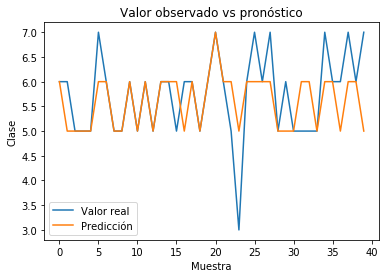

In [10]:
plt.plot(y_test[:40], label='Valor real')
plt.plot(Predict[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.ylabel('Clase')
plt.xlabel("Muestra")
plt.legend(loc=0)
plt.savefig("Error_AR")
plt.show()